#### Task 4 (Part 1)

In [28]:
import pandas as pd

# Function to read specific rows from a CSV file and add activity and subject columns
def read_specific_rows(file_path, activity, subject):
    df = pd.read_csv(file_path, skiprows=range(1, 201), nrows=500)
    df['Activity'] = activity
    df['Subject'] = subject
    return df

# Define activities and subjects

activities = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}


subjects = ['A', 'B', 'C']

# Define file paths and corresponding activities and subjects
files = [
    (r"C:/Recorded Data/Sleep_1.csv", 6, 'A'),
    (r"C:/Recorded Data/Sleep_2.csv", 6, 'B'),
    (r"C:/Recorded Data/Sleep_3.csv", 6, 'C'),
    (r"C:/Recorded Data/S_1.csv", 4, 'A'),
    (r"C:/Recorded Data/S_2.csv", 4, 'B'),
    (r"C:/Recorded Data/S_3.csv", 4, 'C'),
    (r"C:/Recorded Data/St_1.csv", 5, 'A'),
    (r"C:/Recorded Data/St_2.csv", 5, 'B'),
    (r"C:/Recorded Data/St_3.csv", 5, 'C'),
    (r"C:/Recorded Data/W1.csv", 1, 'A'),
    (r"C:/Recorded Data/W2.csv", 1, 'B'),
    (r"C:/Recorded Data/W3.csv", 1, 'C'),
    (r"C:/Recorded Data/WD_1.csv", 3, 'A'),
    (r"C:/Recorded Data/WD_2.csv", 3, 'B'),
    (r"C:/Recorded Data/WD_3.csv", 3, 'C'),
    (r"C:/Recorded Data/WU_1.csv", 2, 'A'),
    (r"C:/Recorded Data/WU_2.csv", 2, 'B'),
    (r"C:/Recorded Data/WU_3.csv", 2, 'C')
]

# Read and combine all data
recorded_df = pd.concat([read_specific_rows(file, activities[activity], subject) for file, activity, subject in files], ignore_index=True)

# Save combined data to a CSV file
recorded_df.to_csv(r"C:/Recorded Data/Combined_Activities.csv", index = False)
recorded_df

,time,ax (m/s^2),ay (m/s^2),az (m/s^2),aT (m/s^2),Activity,Subject,gFx,gFy,gFz,TgF
0,0.994777,0.0102,0.0025,-0.0830,0.084,LAYING,A,NaN,NaN,NaN,NaN
1,0.999116,0.0288,0.0004,-0.0966,0.101,LAYING,A,NaN,NaN,NaN,NaN
2,1.004576,0.0285,-0.0064,-0.1053,0.109,LAYING,A,NaN,NaN,NaN,NaN
3,1.008657,0.0330,-0.0180,-0.1045,0.111,LAYING,A,NaN,NaN,NaN,NaN
4,1.013327,0.0424,-0.0055,-0.0989,0.108,LAYING,A,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8995,3.464693,-0.2104,0.1315,-0.0888,0.264,WALKING_UPSTAIRS,C,NaN,NaN,NaN,NaN
8996,3.469893,-0.1981,0.1704,-0.0565,0.267,WALKING_UPSTAIRS,C,NaN,NaN,NaN,NaN
8997,3.475270,-0.2185,0.2098,-0.0386,0.305,WALKING_UPSTAIRS,C,NaN,NaN,NaN,NaN
8998,3.478795,-0.2476,0.2591,-0.0161,0.359,WALKING_UPSTAIRS,C,NaN,NaN,NaN,NaN


In [21]:
df = recorded_df.drop( columns=[ 'time','gFx',	'gFy' ,	'gFz' ,	'TgF', 'aT (m/s^2)', 'Activity'])

# Assuming your DataFrame is named 'df'
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}
df['Activity'] =df['Activity'].map(classes)
Activity_label = [6,6,6,4,4,4,5,5,5,1,1,1,3,3,3,2,2,2]
df

,ax (m/s^2),ay (m/s^2),az (m/s^2),Activity,Subject
0,0.0102,0.0025,-0.0830,6,A
1,0.0288,0.0004,-0.0966,6,A
2,0.0285,-0.0064,-0.1053,6,A
3,0.0330,-0.0180,-0.1045,6,A
4,0.0424,-0.0055,-0.0989,6,A
...,...,...,...,...,...
8995,-0.2104,0.1315,-0.0888,2,C
8996,-0.1981,0.1704,-0.0565,2,C
8997,-0.2185,0.2098,-0.0386,2,C
8998,-0.2476,0.2591,-0.0161,2,C


Accuracy on recorded data (without featurizing): 16.666666666666664%


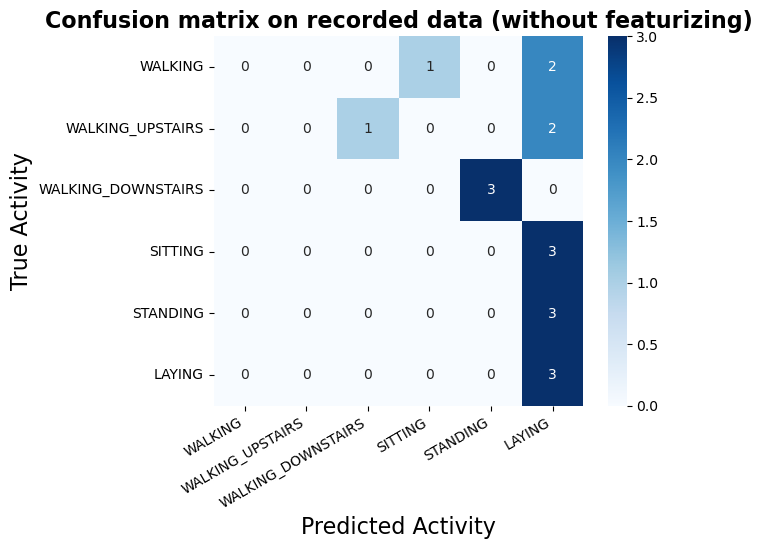

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

model = DecisionTreeClassifier(random_state=10)
model.fit(X_train.reshape(-1,500*3), y_train)
y_pred = model.predict(df[['ax (m/s^2)','ay (m/s^2)', 'az (m/s^2)']].values.reshape(-1,500*3))

accuracy = accuracy_score(Activity_label, y_pred)
conf_matrix = confusion_matrix(Activity_label, y_pred)

print(f"Accuracy on recorded data (without featurizing): {accuracy * 100}%")
sns.heatmap(conf_matrix,
            annot=True,
            square=True,
            cmap="Blues",
            fmt="d",
            xticklabels=classes.keys(), 
            yticklabels=classes.keys())
plt.xlabel("Predicted Activity", fontdict={'fontsize': 16})
plt.ylabel("True Activity", fontdict={'fontsize': 16})
plt.title("Confusion matrix on recorded data (without featurizing)", fontdict={'fontsize': 16, 'fontweight': 'bold'})
_ = plt.xticks(rotation=30, ha="right")